<a href="https://colab.research.google.com/github/venkateshblks/Data-Science-Assignment-eCommerce-Transactions/blob/main/Bantupalli_Venkateswararao_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gdown
ids = {
    '1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE': 'customers.csv',
    '1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0': 'products.csv',
    '1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF': 'transactions.csv',
}

for file_id, output_filename in ids.items():
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, output_filename, quiet=False)
    print(f'Downloaded {output_filename}')


Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/customers.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 7.16MB/s]


Downloaded customers.csv


Downloading...
From: https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/products.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 8.96MB/s]


Downloaded products.csv


Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 32.1MB/s]

Downloaded transactions.csv


# Importing Libraries

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In [3]:
customers=pd.read_csv('customers.csv')
products=pd.read_csv('products.csv')
transactions=pd.read_csv('transactions.csv')

In [4]:
display(customers.head(3))
display(customers.shape)
display(products.head(3))
display(products.shape)
display(transactions.head(3))
transactions.shape

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


(200, 4)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


(100, 4)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


(1000, 7)

In [5]:
display(customers.isnull().sum())
display(products.isnull().sum())
transactions.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


,0
ProductID,0
ProductName,0
Category,0
Price,0


,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [6]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
transactions.duplicated().sum()

0
0


0

**merge the datasets to perform comprehensive EDA.**

In [7]:
merged_df = transactions.merge(customers, on='CustomerID', how='left')
merged_df = merged_df.merge(products, on='ProductID', how='left')

In [8]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [9]:
check=merged_df['Price_x'] == merged_df['Price_y']
check.value_counts()

,count
True,1000


**So  both columns are the same**


**Drop the Price_y column and Rename Price_x to Price**

In [10]:
merged_df = merged_df.drop(columns=['Price_y'])
merged_df = merged_df.rename(columns={'Price_x': 'Price'})
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [11]:
merged_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


**Convert TransactionDate to datetime**

In [13]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

In [14]:
merged_df['TransactionTime'] = merged_df['TransactionDate'].dt.time
merged_df['TransactionDate'] = merged_df['TransactionDate'].dt.date

In [15]:
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,TransactionTime
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,12:38:23
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,22:23:54
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,07:38:55
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,22:55:37
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,15:10:10


In [16]:
merged_df.nunique()

,0
TransactionID,1000
CustomerID,199
ProductID,100
TransactionDate,337
Quantity,4
TotalValue,369
Price,100
CustomerName,199
Region,4
SignupDate,178


### **Product category distribution**

In [17]:
merged_df.Category.value_counts()


,count
Category,
Books,270
Electronics,254
Home Decor,248
Clothing,228


### **Customer region distribution**

In [18]:
merged_df['Region'].value_counts()

,count
Region,
South America,304
North America,244
Europe,234
Asia,218


### **Transaction trends**

**transaction counts**

In [19]:
merged_df.groupby('TransactionDate').size().sort_values(ascending=False)

,0
TransactionDate,
2024-01-31,9
2024-09-30,8
2024-08-15,8
2024-07-12,7
2024-05-28,7
...,...
2024-07-04,1
2024-06-24,1
2024-06-23,1


**total sales by date**

In [20]:
merged_df.groupby('TransactionDate')['TotalValue'].sum().sort_values(ascending=False)

,TotalValue
TransactionDate,
2024-09-04,7585.50
2024-12-18,6843.94
2024-12-03,6258.32
2024-07-14,5880.49
2024-05-08,5813.44
...,...
2024-11-14,114.20
2024-06-15,100.77
2024-03-22,100.77


### **Total sales by product**

In [21]:
merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)

,TotalValue
ProductName,
ActiveWear Smartwatch,39096.97
SoundWave Headphones,25211.64
SoundWave Novel,24507.90
ActiveWear Jacket,22712.56
ActiveWear Rug,22314.43
...,...
ComfortLiving Desk Lamp,1694.16
SoundWave Bluetooth Speaker,1223.22
ComfortLiving Rug,1063.81


**ActiveWear Smartwatch" generates the highest total value at 39,096.97**

In [74]:
merged_df['ProductName'].value_counts()

,count
ProductName,
ActiveWear Smartwatch,40
SoundWave Headphones,38
BookWorld Biography,30
ActiveWear Rug,29
SoundWave Cookbook,29
...,...
HomeSense Bluetooth Speaker,7
BookWorld Wall Art,7
SoundWave Laptop,7


## Data Visualiztion

Text(0.5, 1.0, 'Price Distribution')

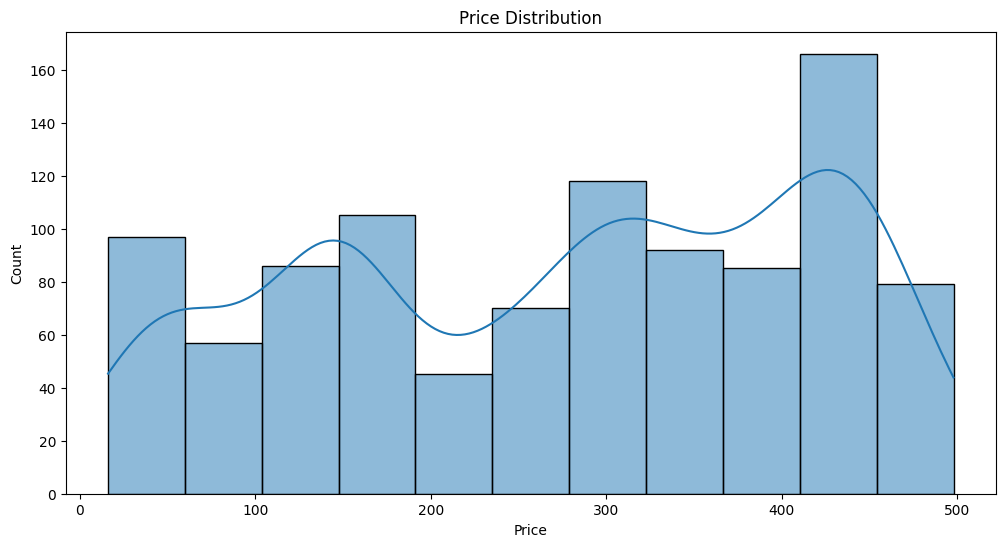

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Price'], kde=True, )
plt.title('Price Distribution')

<Axes: xlabel='ProductName'>

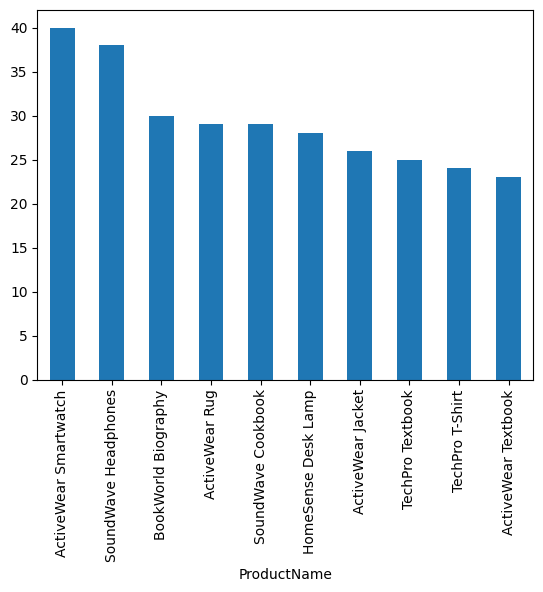

In [72]:
merged_df['ProductName'].value_counts().head(10).plot(kind='bar')

Text(0.5, 1.0, 'Transactions by Region')

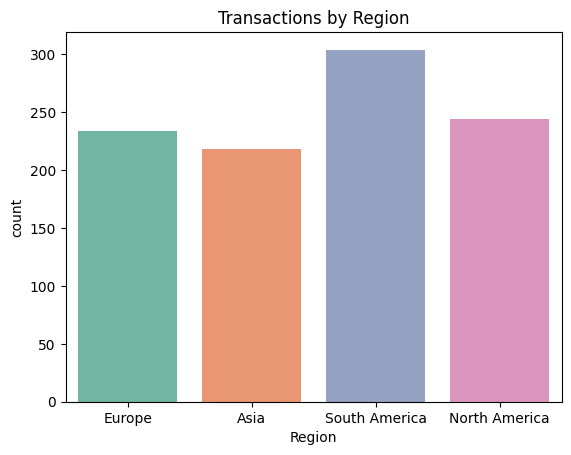

In [23]:
sns.countplot(data=merged_df, x='Region', palette='Set2')
plt.title('Transactions by Region')

In [24]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['TransactionTime'] = pd.to_datetime(merged_df['TransactionTime'], format='%H:%M:%S')
merged_df['Month'] = merged_df['TransactionDate'].dt.month
merged_df['Year'] = merged_df['TransactionDate'].dt.year
merged_df['TransactionHour'] = merged_df['TransactionTime'].dt.hour

In [25]:
merged_df.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,TransactionTime,Month,Year,TransactionHour
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,1900-01-01 12:38:23,8,2024,12
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,1900-01-01 22:23:54,5,2024,22
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,1900-01-01 07:38:55,4,2024,7


In [26]:
merged_df.Year.value_counts()

,count
Year,
2024,996
2023,4


In [33]:
merged_df['Month'].value_counts()

,count
Month,
1,107
9,96
7,96
8,94
5,86
4,86
12,82
3,80
2,77


Text(0.5, 1.0, 'Transactions per Month')

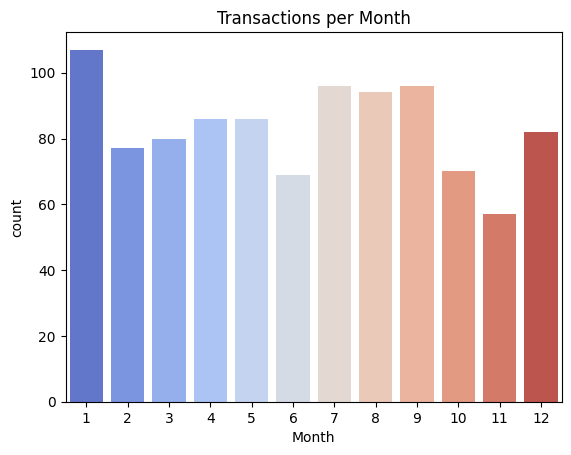

In [27]:
sns.countplot(data=merged_df, x='Month', palette='coolwarm')
plt.title('Transactions per Month')

In [52]:
merged_df.TransactionDate.value_counts()

,count
TransactionDate,
2024-01-31,9
2024-09-30,8
2024-08-15,8
2024-05-28,7
2024-01-17,7
...,...
2024-09-15,1
2024-02-10,1
2024-10-19,1


In [53]:
merged_df.groupby('TransactionDate').size().sort_values().value_counts()

,count
2,80
3,74
4,66
1,65
5,33
6,13
7,3
8,2
9,1


<Axes: >

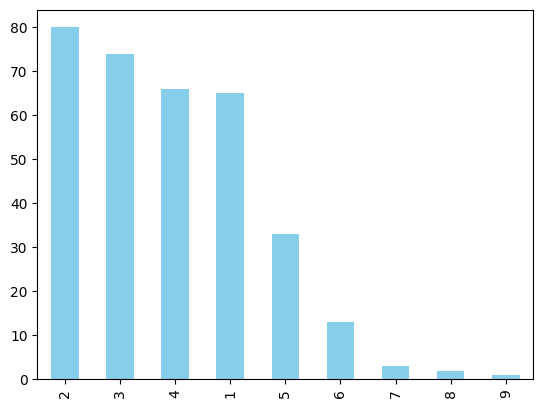

In [54]:
merged_df.groupby('TransactionDate').size().sort_values().value_counts().plot(kind='bar', color='skyblue')

<Axes: xlabel='Quantity', ylabel='Count'>

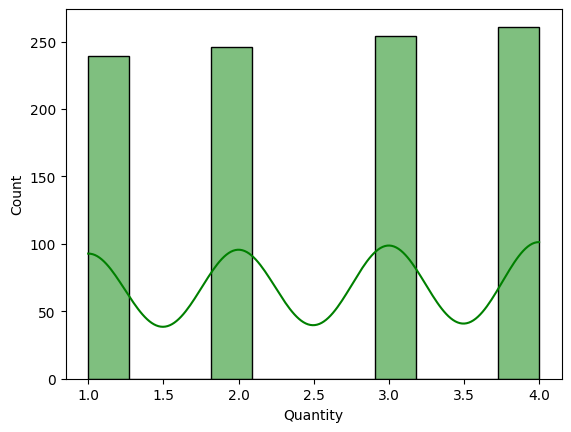

In [29]:
sns.histplot(merged_df['Quantity'], kde=True, color='green')

<Axes: xlabel='TransactionHour'>

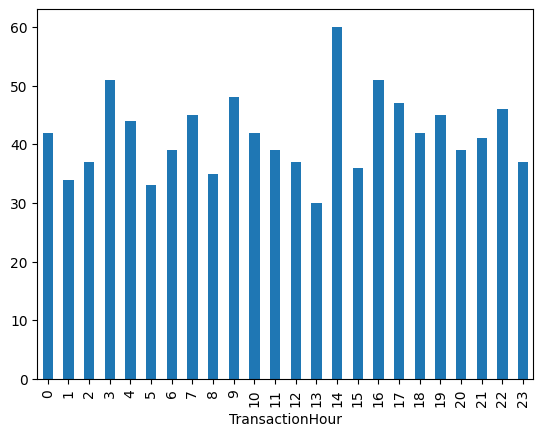

In [30]:
merged_df['TransactionHour'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Category'>

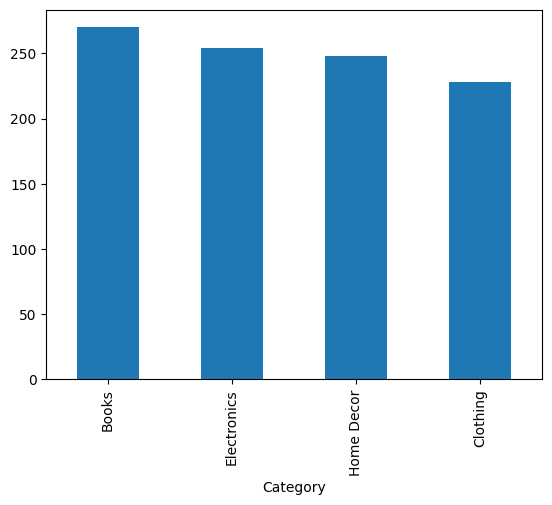

In [31]:
merged_df.Category.value_counts().plot(kind='bar')

# Business Insights

* The dataset shows that "Books" has the highest transaction volume with 270 entries, followed closely by "Electronics" (254), "Home Decor" (248), and "Clothing" (228). This suggests that books and electronics are the most popular categories, which could inform inventory and marketing strategies. A focus on promoting these high-volume categories could potentially drive even higher sales, while lower-volume categories like Clothing and Home Decor might benefit from targeted promotions or bundling strategies to boost performance.


* "South America" leads in transaction volume with 304 entries, followed by "North America" (244), "Europe" (234), and "Asia" (218). This indicates that South America is the highest-performing region in terms of sales. Focusing marketing efforts, promotions, and tailored offerings in this region could yield strong returns. Additionally, understanding regional preferences and local market trends in the other regions (North America, Europe, and Asia) could help optimize the product offerings and drive growth in those markets.


* most days have 2 to 4 transactions, with 80 days having exactly 2 transactions, 74 days with 3 transactions, and 66 days with 4 transactions. However, there are fewer days with higher transaction volumes, such as just 1 day with 9 transactions. This suggests that the business experiences moderate daily activity, but there are some days with very low transaction volumes. Focusing on increasing transactions on the less frequent high-volume days (7, 8, or 9 transactions) through targeted promotions could help improve overall daily sales consistency.


* Transactions are highest in January (107), followed by September and July (96 each), indicating peak sales during the start and middle of the year. December has the lowest transactions (82), suggesting a seasonal dip. To boost sales, focus marketing efforts in January, September, and July, while offering promotions in slower months like December and November to drive activity.


* "ActiveWear Smartwatch" leads with 40 transactions, followed by "SoundWave Headphones" with 38, suggesting these products are top performers. Product like "SoundWave Jacket" each have only 5 transactions, indicating lower demand. To optimize sales, focus on promoting best-sellers like the Smartwatch and Headphones, while re-evaluating the marketing and pricing strategies for lower-performing products to boost their sales.


* "ActiveWear Smartwatch" generates the highest total value at 39,096.97, followed by "SoundWave Headphones" with 25,211.64, indicating these products contribute significantly to revenue. On the other hand, products like "ComfortLiving Laptop" (647.76) and "ActiveWear T-Shirt" (795.34) contribute much less to total sales. To maximize revenue, the business should prioritize high-value products in marketing campaigns while re-assessing the positioning or pricing of lower-contributing items to improve their performance.